# Housekeeping

- PyTorch hates new Python
- Need some environment, try `conda`

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Neural Network

- Raschka, Liu and Mirjalili (2022) Ch11

Big picture

<img src="https://www.dropbox.com/scl/fi/dm7tnx2zd57opluwc50az/nn.png?rlkey=g0ynmf926rtn7dgv0rrd2f7zf&st=4eei446g&dl=1" width=500/>


Layers

<img src="https://www.dropbox.com/scl/fi/rdeb4idd0dlstm375amvk/nn_layers.png?rlkey=r2bixu6nc1pl9s412ddstdztp&st=zwcoes9t&dl=1" width=500/>


Activation

<img src="https://www.dropbox.com/scl/fi/g4gep3xbkhqzfqxi0z8x6/nn_activate.png?rlkey=vck5di07wiujjvwjuj3ip999p&st=muk75avt&dl=1" width=500/>

## PyTorch and Deep Learning

- Assignment Example

In [3]:
df_train = pd.read_csv('./assignment/train_data.csv')
df_test = pd.read_csv('./assignment/test_data.csv')
df_solution = pd.read_csv('assignment/solution.csv')

X_name_list = [col for col in df_train.columns if col not in ['ID', 'Y']]
X = df_train[X_name_list]
y = df_train['Y']
X_test = df_test[X_name_list]
y_test = df_solution['Y']

## Data to Tensor

In [6]:
# Convert pandas DataFrames to torch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Calculate lengths for train/validation split (80/20)
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size

# Split the dataset
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size], generator=torch.Generator().manual_seed(42))

# Optionally, extract X_train, y_train, X_valid, y_valid as tensors
X_train, y_train = train_dataset[:][0], train_dataset[:][1]
X_valid, y_valid = valid_dataset[:][0], valid_dataset[:][1]

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [9]:
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

### ReLU is DT

<img src="https://www.dropbox.com/scl/fi/ytua6sg1zyoze9jkstk5x/relu.jpg?rlkey=xu6p1knklu0zhs3zjnyq7wpql&st=w21w9lod&dl=1" width=300 />

## Create an Instance

- Namelt, create an application

In [12]:
my_first_DNN = DNN(input_dim=X_train.shape[1], hidden_dim1=64, hidden_dim2=32, output_dim=1) 

## Optimiser

In [13]:
optimizer = optim.Adam(my_first_DNN.parameters(), lr=0.001)

## Create data


In [5]:
# Create DataLoaders for training and validation
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

## Loss function

In [15]:
# Set loss function
criterion = nn.MSELoss()

## Model training

In [16]:
num_epochs = 50  # You can adjust this
train_losses = []
valid_losses = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    my_first_DNN.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = my_first_DNN(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / train_size
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}")
    train_losses.append(epoch_loss)

    my_first_DNN.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            outputs = my_first_DNN(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / valid_size
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {epoch_loss:.4f}")
    valid_losses.append(epoch_loss)

Epoch 1/50
Epoch 1/50, Training Loss: 13.3397
Epoch 1/50, Validation Loss: 11.0801
Epoch 2/50
Epoch 2/50, Training Loss: 12.2423
Epoch 2/50, Validation Loss: 9.4740
Epoch 3/50
Epoch 3/50, Training Loss: 9.6075
Epoch 3/50, Validation Loss: 6.8244
Epoch 4/50
Epoch 4/50, Training Loss: 7.3466
Epoch 4/50, Validation Loss: 6.4426
Epoch 5/50
Epoch 5/50, Training Loss: 6.8640
Epoch 5/50, Validation Loss: 6.4133
Epoch 6/50
Epoch 6/50, Training Loss: 6.5169
Epoch 6/50, Validation Loss: 6.3488
Epoch 7/50
Epoch 7/50, Training Loss: 6.2427
Epoch 7/50, Validation Loss: 6.3264
Epoch 8/50
Epoch 8/50, Training Loss: 5.9964
Epoch 8/50, Validation Loss: 6.2460
Epoch 9/50
Epoch 9/50, Training Loss: 5.6887
Epoch 9/50, Validation Loss: 6.2961
Epoch 10/50
Epoch 10/50, Training Loss: 5.3916
Epoch 10/50, Validation Loss: 6.2588
Epoch 11/50
Epoch 11/50, Training Loss: 5.1093
Epoch 11/50, Validation Loss: 6.2161
Epoch 12/50
Epoch 12/50, Training Loss: 4.8043
Epoch 12/50, Validation Loss: 6.1787
Epoch 13/50
Epoc

## Check

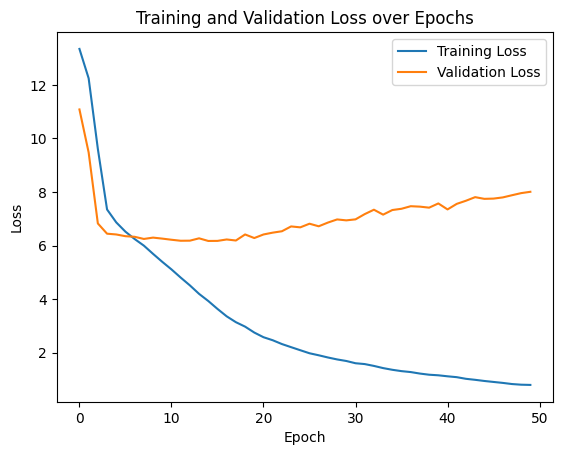

In [18]:
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
# Find the epoch with the minimum validation loss
best_epoch = np.argmin(valid_losses)
print(f"Best epoch: {best_epoch+1}, Validation Loss: {valid_losses[best_epoch]:.4f}")

Best epoch: 15, Validation Loss: 6.1711


In [20]:
# restart the optimiser
optimizer = optim.Adam(my_first_DNN.parameters(), lr=0.001)

In [21]:
num_epochs = 50  # You can adjust this
train_losses = []
valid_losses = []

best_val_loss = float('inf')

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    my_first_DNN.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = my_first_DNN(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / train_size
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}")
    train_losses.append(epoch_loss)
    if epoch_loss < best_val_loss:
        best_val_loss = epoch_loss
        torch.save(my_first_DNN.state_dict(), 'best_model.pth')

    my_first_DNN.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            outputs = my_first_DNN(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / valid_size
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {epoch_loss:.4f}")
    valid_losses.append(epoch_loss)

Epoch 1/50
Epoch 1/50, Training Loss: 0.8616
Epoch 1/50, Validation Loss: 8.0599
Epoch 2/50
Epoch 2/50, Training Loss: 0.7244
Epoch 2/50, Validation Loss: 7.9996
Epoch 3/50
Epoch 3/50, Training Loss: 0.6991
Epoch 3/50, Validation Loss: 8.0476
Epoch 4/50
Epoch 4/50, Training Loss: 0.6942
Epoch 4/50, Validation Loss: 8.1373
Epoch 5/50
Epoch 5/50, Training Loss: 0.6654
Epoch 5/50, Validation Loss: 8.2252
Epoch 6/50
Epoch 6/50, Training Loss: 0.6368
Epoch 6/50, Validation Loss: 8.2235
Epoch 7/50
Epoch 7/50, Training Loss: 0.6198
Epoch 7/50, Validation Loss: 8.3625
Epoch 8/50
Epoch 8/50, Training Loss: 0.6052
Epoch 8/50, Validation Loss: 8.2349
Epoch 9/50
Epoch 9/50, Training Loss: 0.5757
Epoch 9/50, Validation Loss: 8.4308
Epoch 10/50
Epoch 10/50, Training Loss: 0.5472
Epoch 10/50, Validation Loss: 8.4021
Epoch 11/50
Epoch 11/50, Training Loss: 0.5439
Epoch 11/50, Validation Loss: 8.4367
Epoch 12/50
Epoch 12/50, Training Loss: 0.5126
Epoch 12/50, Validation Loss: 8.5294
Epoch 13/50
Epoch 1

In [23]:
my_first_DNN.load_state_dict(torch.load('best_model.pth', weights_only=True))

<All keys matched successfully>

## Prediction

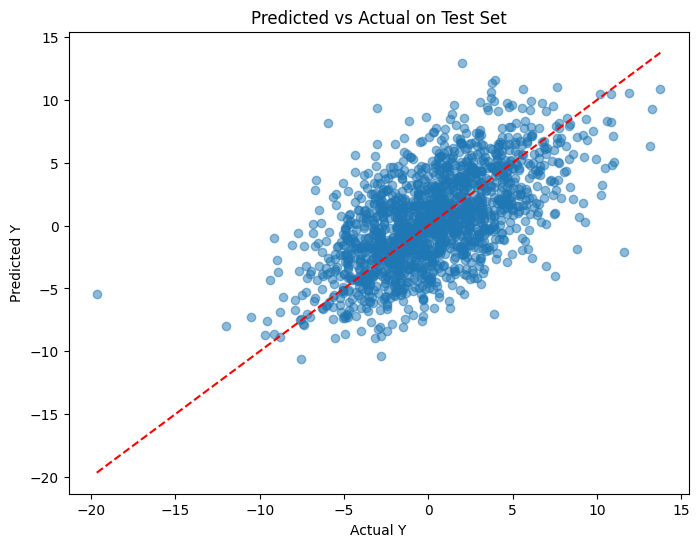

Test MSE: 11.4269


In [24]:
# Set model to evaluation mode
my_first_DNN.eval()

# Predict on the test set
with torch.no_grad():
    y_pred_test = my_first_DNN(X_test_tensor)

# Convert predictions and true values to numpy arrays for comparison
y_pred_test_np = y_pred_test.squeeze().cpu().numpy()
y_test_np = y_test_tensor.squeeze().cpu().numpy()

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_test_np, alpha=0.5)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs Actual on Test Set')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.show()

# Calculate and print test MSE
test_mse = criterion(y_pred_test, y_test_tensor).item()
print(f"Test MSE: {test_mse:.4f}")

# DNN is too big

In [27]:
my_second_DNN = DNN(input_dim=X_train.shape[1], hidden_dim1=20, hidden_dim2=10, output_dim=1) 
optimizer = optim.Adam(my_second_DNN.parameters(), lr=0.001)

num_epochs = 50  # You can adjust this
train_losses = []
valid_losses = []

best_val_loss = float('inf')

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    my_second_DNN.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = my_second_DNN(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / train_size
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}")
    train_losses.append(epoch_loss)
    if epoch_loss < best_val_loss:
        best_val_loss = epoch_loss
        torch.save(my_second_DNN.state_dict(), 'best_model.pth')

    my_second_DNN.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            outputs = my_second_DNN(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / valid_size
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {epoch_loss:.4f}")
    valid_losses.append(epoch_loss)

Epoch 1/50
Epoch 1/50, Training Loss: 13.4578
Epoch 1/50, Validation Loss: 11.3955
Epoch 2/50
Epoch 2/50, Training Loss: 12.9956
Epoch 2/50, Validation Loss: 10.8721
Epoch 3/50
Epoch 3/50, Training Loss: 12.2149
Epoch 3/50, Validation Loss: 9.9413
Epoch 4/50
Epoch 4/50, Training Loss: 10.9263
Epoch 4/50, Validation Loss: 8.5674
Epoch 5/50
Epoch 5/50, Training Loss: 9.3048
Epoch 5/50, Validation Loss: 7.2392
Epoch 6/50
Epoch 6/50, Training Loss: 7.9301
Epoch 6/50, Validation Loss: 6.5787
Epoch 7/50
Epoch 7/50, Training Loss: 7.2480
Epoch 7/50, Validation Loss: 6.4411
Epoch 8/50
Epoch 8/50, Training Loss: 6.9534
Epoch 8/50, Validation Loss: 6.4819
Epoch 9/50
Epoch 9/50, Training Loss: 6.7872
Epoch 9/50, Validation Loss: 6.4368
Epoch 10/50
Epoch 10/50, Training Loss: 6.6400
Epoch 10/50, Validation Loss: 6.4470
Epoch 11/50
Epoch 11/50, Training Loss: 6.5146
Epoch 11/50, Validation Loss: 6.4773
Epoch 12/50
Epoch 12/50, Training Loss: 6.3930
Epoch 12/50, Validation Loss: 6.4653
Epoch 13/50
E

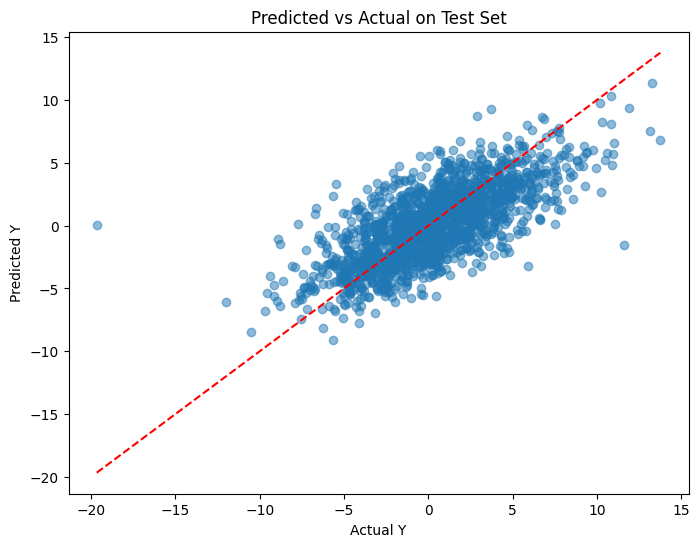

Test MSE: 6.9274


In [28]:
my_second_DNN.load_state_dict(torch.load('best_model.pth', weights_only=True))
# Set model to evaluation mode
my_second_DNN.eval()

# Predict on the test set
with torch.no_grad():
    y_pred_test = my_second_DNN(X_test_tensor)

# Convert predictions and true values to numpy arrays for comparison
y_pred_test_np = y_pred_test.squeeze().cpu().numpy()
y_test_np = y_test_tensor.squeeze().cpu().numpy()

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_test_np, alpha=0.5)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs Actual on Test Set')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.show()

# Calculate and print test MSE
test_mse = criterion(y_pred_test, y_test_tensor).item()
print(f"Test MSE: {test_mse:.4f}")

# end of file